In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
import geopandas as gpd
from shapely.ops import cascaded_union

In [3]:
shapes = gpd.read_file('../shapefiles/ICU_geometries0_360/ICU_geometries0_360.shp')

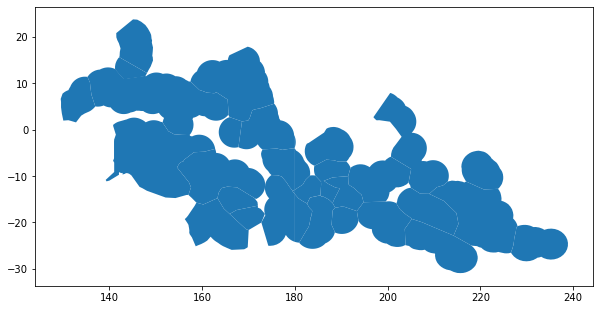

In [4]:
shapes.plot(figsize=(10, 6))

In [5]:
shapes.COUNTRYNAM

0                      New Caledonia
1                   Pitcairn Islands
2                   Papua New Guinea
3                    Solomon Islands
4          Kiribati: Phoenix Islands
5                               Fiji
6                             Tuvalu
7              Northern Cook Islands
8             Kiribati: Line Islands
9     Federated States of Micronesia
10                             Samoa
11         Kiribati: Gilbert Islands
12                   Wallis & Futuna
13                           Tokelau
14         Tuamotu / Gambier Islands
15                             Tonga
16                              Niue
17             Southern Cook Islands
18                   Austral Islands
19                   Society Islands
20                         Marquesas
21                     Vanuatu South
22                     Vanuatu North
23                              Guam
24                 Northern Marianas
25                  Marshall Islands
26                             Nauru
2

In [6]:
shapes.head()

,COUNTRYNAM,geometry
0,New Caledonia,"POLYGON ((158.611 -25.147, 157.801 -23.248, 15..."
1,Pitcairn Islands,"POLYGON ((227.501 -22.512, 227.771 -21.018, 22..."
2,Papua New Guinea,"POLYGON ((157.168 -13.693, 157.038 -14.068, 15..."
3,Solomon Islands,"POLYGON ((173.591 -11.854, 173.526 -12.596, 17..."
4,Kiribati: Phoenix Islands,"POLYGON ((191.078 -6.882, 189.583 -6.899, 189...."


In [7]:
countries = ['Fiji','Tuvalu','Kiribati: Phoenix Islands', 'Kiribati: Line Islands', 'Kiribati: Gilbert Islands']

In [8]:
shapes_dissolved = shapes.copy()

In [9]:
shapes_dissolved.COUNTRYNAM

0                      New Caledonia
1                   Pitcairn Islands
2                   Papua New Guinea
3                    Solomon Islands
4          Kiribati: Phoenix Islands
5                               Fiji
6                             Tuvalu
7              Northern Cook Islands
8             Kiribati: Line Islands
9     Federated States of Micronesia
10                             Samoa
11         Kiribati: Gilbert Islands
12                   Wallis & Futuna
13                           Tokelau
14         Tuamotu / Gambier Islands
15                             Tonga
16                              Niue
17             Southern Cook Islands
18                   Austral Islands
19                   Society Islands
20                         Marquesas
21                     Vanuatu South
22                     Vanuatu North
23                              Guam
24                 Northern Marianas
25                  Marshall Islands
26                             Nauru
2

In [10]:
sub_l = []

In [11]:
for i in range(len(shapes_dissolved)):
    sub = shapes_dissolved.loc[[i],:]
    sub_l.append(gpd.GeoSeries(cascaded_union(sub.geometry))) 

In [12]:
type(gpd.pd.concat(sub_l))

geopandas.geoseries.GeoSeries

In [13]:
gdf = gpd.GeoDataFrame(gpd.pd.concat(sub_l))

In [14]:
gdf.columns = ['geometry']

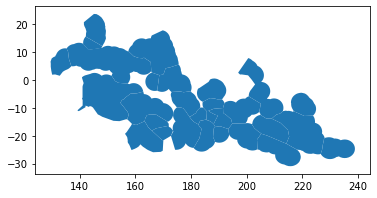

In [15]:
gdf.plot()

In [16]:
gdf.loc[:,'COUNTRYNAM'] = shapes_dissolved.COUNTRYNAM.values

In [17]:
gdf.index = range(len(gdf))

In [18]:
gdf.head()

,geometry,COUNTRYNAM
0,"POLYGON ((158.611 -25.147, 157.801 -23.248, 15...",New Caledonia
1,"POLYGON ((227.501 -22.512, 227.771 -21.018, 22...",Pitcairn Islands
2,"POLYGON ((157.168 -13.693, 157.038 -14.068, 15...",Papua New Guinea
3,"POLYGON ((173.591 -11.854, 173.526 -12.596, 17...",Solomon Islands
4,"POLYGON ((191.078 -6.882, 189.583 -6.899, 189....",Kiribati: Phoenix Islands


In [19]:
shapes.head()

,COUNTRYNAM,geometry
0,New Caledonia,"POLYGON ((158.611 -25.147, 157.801 -23.248, 15..."
1,Pitcairn Islands,"POLYGON ((227.501 -22.512, 227.771 -21.018, 22..."
2,Papua New Guinea,"POLYGON ((157.168 -13.693, 157.038 -14.068, 15..."
3,Solomon Islands,"POLYGON ((173.591 -11.854, 173.526 -12.596, 17..."
4,Kiribati: Phoenix Islands,"POLYGON ((191.078 -6.882, 189.583 -6.899, 189...."


In [20]:
gdf = gdf.loc[:,['COUNTRYNAM','geometry']]

In [21]:
gdf

,COUNTRYNAM,geometry
0,New Caledonia,"POLYGON ((158.611 -25.147, 157.801 -23.248, 15..."
1,Pitcairn Islands,"POLYGON ((227.501 -22.512, 227.771 -21.018, 22..."
2,Papua New Guinea,"POLYGON ((157.168 -13.693, 157.038 -14.068, 15..."
3,Solomon Islands,"POLYGON ((173.591 -11.854, 173.526 -12.596, 17..."
4,Kiribati: Phoenix Islands,"POLYGON ((191.078 -6.882, 189.583 -6.899, 189...."
5,Fiji,"POLYGON ((180.000 -13.919, 180.445 -14.440, 18..."
6,Tuvalu,"POLYGON ((180.000 -12.940, 179.535 -13.240, 17..."
7,Northern Cook Islands,"POLYGON ((199.549 -15.514, 194.799 -15.646, 19..."
8,Kiribati: Line Islands,"POLYGON ((212.929 -11.213, 212.470 -11.594, 21..."
9,Federated States of Micronesia,"POLYGON ((160.932 8.008, 160.934 8.007, 160.94..."


In [22]:
# countries = ['Fiji','Tuvalu','Kiribati: Phoenix Islands', 'Kiribati: Line Islands', 'Kiribati: Gilbert Islands']

In [23]:
# for i in range(len(shapes_dissolved)): 
#     sub = shapes_dissolved.loc[[i]]
#     if sub.COUNTRYNAM.values[0] in countries:
#         sub.loc[:,'geometry'] = cascaded_union(sub.geometry)
#         shapes_dissolved.loc[[i]] = sub

In [24]:
forecasts = gpd.read_file('../geojsons/ICU_rainfall_forecast_latest.geojson')

In [25]:
forecasts.loc[:,'geometry'] = gdf.loc[:,'geometry']

In [26]:
with open('../geojsons/ICU_rainfall_forecast_latest_0_360.geojson', 'w') as f:
    f.write(forecasts.to_json())

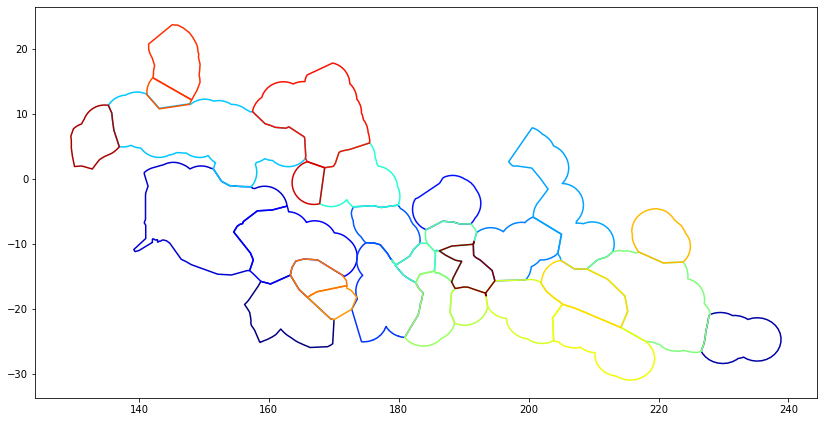

In [27]:
f, ax = plt.subplots(figsize=(14, 8))
forecasts.geometry.boundary.plot(cmap=plt.cm.jet, ax=ax)
f.savefig('./shapes_dissolved.png', dpi=200, bbox_inches='tight')

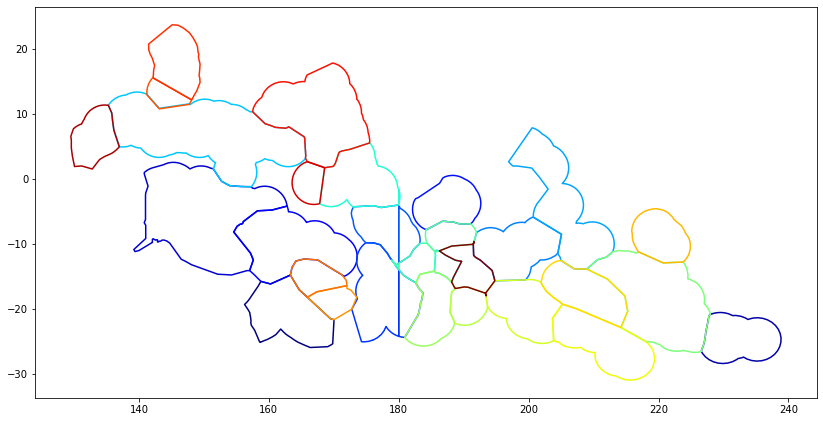

In [28]:
f, ax = plt.subplots(figsize=(14, 8))
shapes.geometry.boundary.plot(cmap=plt.cm.jet, ax=ax)
f.savefig('./shapes_origin.png', dpi=200, bbox_inches='tight')

In [29]:
gdf.to_file('../shapefiles/ICU_geometries0_360_union/ICU_geometries0_360_union.shp') 

In [30]:
gdf.to_file('../../data/shapefiles/ICU/ICU_EEZ_geometries_0_360_union/ICU_geometries0_360_union.shp') 